## Nadya Lucyana (09011381823105)
## SVM (Support Vector Machine)

### Introduction

#### Heart Disease Prediction

Di antara semua organ, Jantung adalah bagian penting dari tubuh kita. Jantung berdetak sekitar 2,5 miliar kali selama rata-rata seumur hidup, mendorong jutaan galon darah ke setiap bagian tubuh.
Di era ini, penyakit jantung semakin meningkat dari hari ke hari karena gaya hidup dan makanan yang modern. Diagnosis penyakit jantung adalah tugas yang menantang. Model klasifikasi ini akan memprediksi apakah pasien mengidap penyakit jantung atau tidak berdasarkan berbagai kondisi / gejala pada tubuhnya.

##### Deskripsi Data:
Dataset berisi 13 fitur independen dan 1 fitur target seperti yang dijelaskan di bawah ini.

- age
- sex
- cp (chest pain type) (4 values)
- trestbps (resting blood pressure)
- chol (serum cholestoral in mg/dl)
- fbs (fasting blood sugar) > 120 mg/dl
- restecg (resting electrocardiographic results) (values 0,1,2)
- thalach (maximum heart rate achieved)
- exang (exercise induced angina)
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- ca - number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target - is the binary target variable, 0 indicates that the patient has heart disease, the value is 1 if not.

### EDA

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
import os
import warnings

from operator import add

MEDIUM_SIZE = 10
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

%matplotlib inline
warnings.filterwarnings('ignore')

#### Import Dataset

In [2]:
uwu = pd.read_csv('heart.csv')
uwu.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print(f'Dataset contains {uwu.shape[0]} samples, {uwu.shape[1] - 1} independent features 1 target continuous variable.')

Dataset contains 303 samples, 13 independent features 1 target continuous variable.


#### Basic Analysis

In [5]:
print(uwu.info())
missing_values = (uwu.isnull().sum() / len(uwu)) * 100
print("\nFeatures with missing values: \n", missing_values[missing_values > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB
None

Features with missing values: 
 Series([], dtype: float64)


- Semua fitur independen dalam dataset adalah numerik
- Variabel target adalah numerik 
- Tidak ada fitur dengan nilai yang hilang.

In [6]:
uwu.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


- No outliers seen in the data

In [8]:
print(np.char.center(" Unique values of categorical variables ", 60, fillchar = "*"))
print("\nSex: ", uwu.sex.unique())
print("Cp: ", sorted(uwu.cp.unique()))
print("fbs: ", sorted(uwu.fbs.unique()))
print("restecg: ", sorted(uwu.restecg.unique()))
print("exang: ", sorted(uwu.exang.unique()))
print("slope: ", sorted(uwu.slope.unique()))
print("ca: ", sorted(uwu.ca.unique()))
print("thal: ", sorted(uwu.thal.unique()))
print("target: ", sorted(uwu.target.unique()))

********** Unique values of categorical variables **********

Sex:  [1 0]
Cp:  [0, 1, 2, 3]
fbs:  [0, 1]
restecg:  [0, 1, 2]
exang:  [0, 1]
slope:  [0, 1, 2]
ca:  [0, 1, 2, 3, 4]
thal:  [0, 1, 2, 3]
target:  [0, 1]


- Sex adalah variabel nominal. 1 - Pria, 0 - Wanita
- Cp - Jenis nyeri dada adalah variabel nominal, nilai uniknya adalah 0, 1, 2 dan 3
- fbs - gula darah puasa adalah variabel biner. Nilainya adalah 1 f (gula darah puasa)> 120 mg / dl, jika tidak 0
- restecg - hasil elektrokardiografi istirahat - adalah variabel nominal, nilai uniknya adalah 0, 1 dan 2
- exang - exercise induced angina adalah variabel biner, Nilai 1 diinduksi, 0 jika tidak
- slope - slope ruas ST latihan puncak adalah variabel nominal, nilai uniknya adalah 0, 1 dan 2
- ca - jumlah kapal besar (0-3) yang diwarnai dengan tepung adalah variabel ordinal, nilainya adalah 0, 1, 2, 3 dan 4
- thal - 3 = normal; 6 = cacat tetap; 7 = Cacat yang dapat dibalik adalah variabel nominal, nilainya adalah 0, 1, 2 dan 3

#### Detailed Analysis

In [16]:
def draw_semi_pie_chart(data, column, fig, renamed_index_dict, title):
    default_colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666']
    rnd.shuffle(default_colors)
    ax = uwu[column].value_counts().rename(index = renamed_index_dict).plot.pie(colors = default_colors, autopct='%1.1f%%', startangle=90, title = title)
    ax.set_ylabel('')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)
        
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    fig.gca().add_artist(centre_circle)

##### Categorical Feature Value Ratio

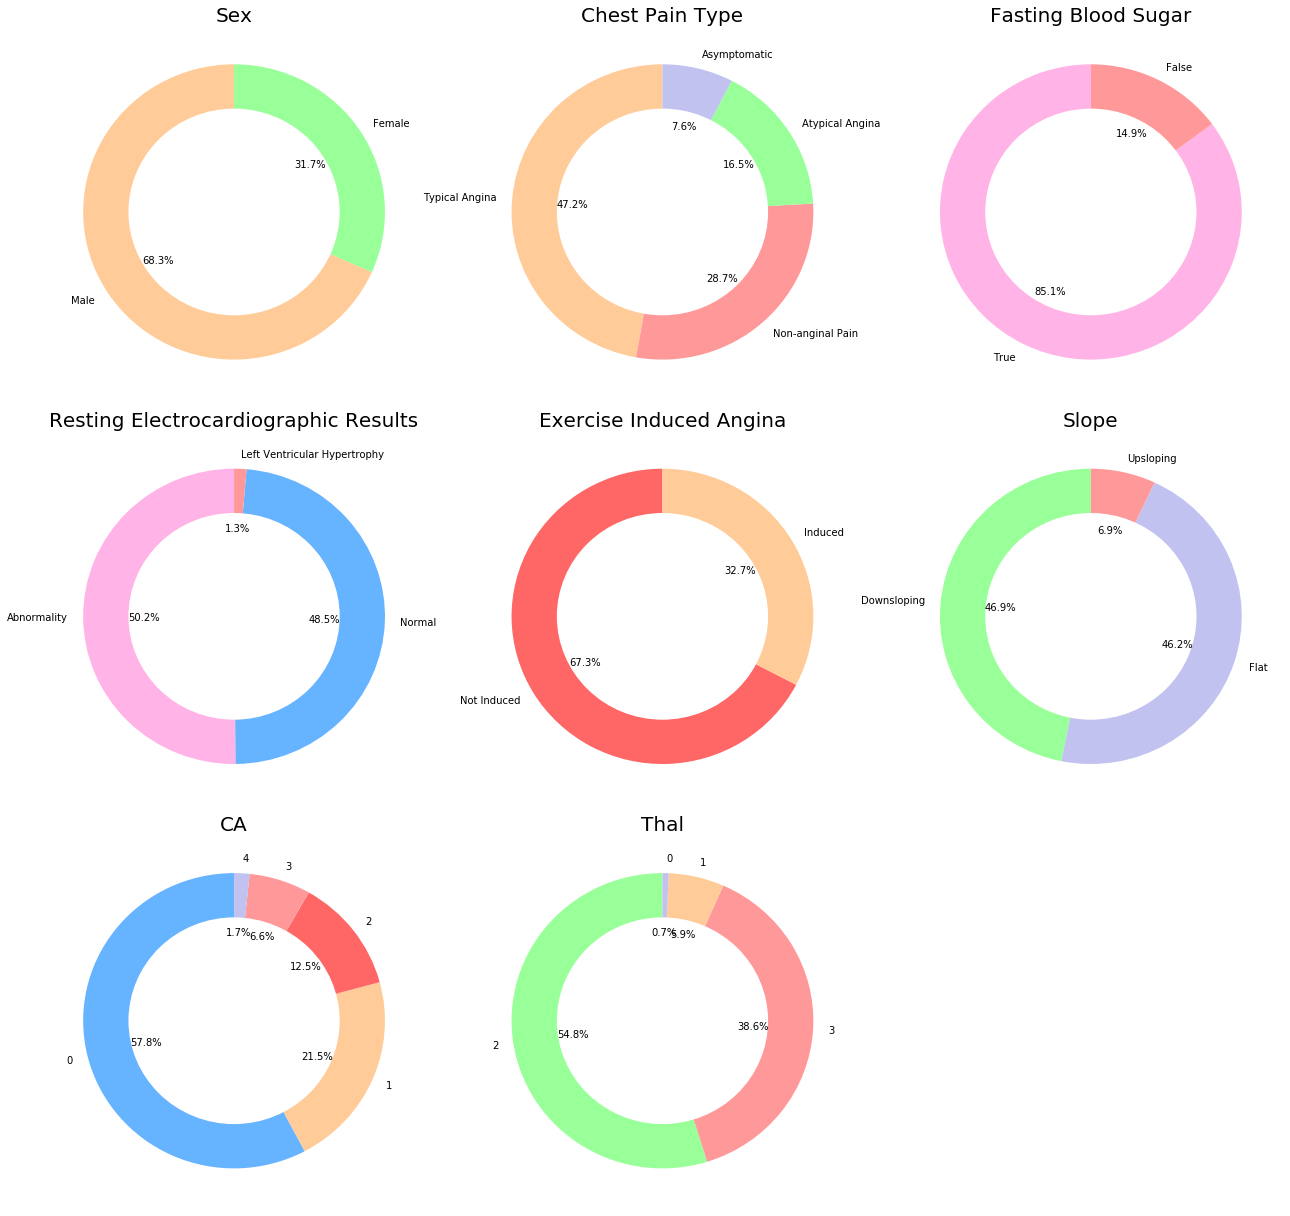

In [17]:
fig = plt.gcf()
fig.set_size_inches(18, 17)
grid_rows = 3
grid_cols = 3

# Draw Sex Pie chart
plt.subplot(grid_rows, grid_cols, 1)
draw_semi_pie_chart(uwu, 'sex', fig, {0: 'Female', 1: 'Male'}, 'Sex')

# Draw Chest pain type chart
plt.subplot(grid_rows, grid_cols, 2)
draw_semi_pie_chart(uwu, 'cp', fig, {0:'Typical Angina', 1:'Atypical Angina', 2:'Non-anginal Pain',3:'Asymptomatic'}, 'Chest Pain Type')

# Draw Fasting blood sugar chart
plt.subplot(grid_rows, grid_cols, 3)
draw_semi_pie_chart(uwu, 'fbs', fig, {0:'True', 1:'False'}, 'Fasting Blood Sugar')

# Draw restecg - resting electrocardiographic results
plt.subplot(grid_rows, grid_cols, 4)
draw_semi_pie_chart(uwu, 'restecg', fig, {0:'Normal', 1:'Abnormality', 2:'Left Ventricular Hypertrophy'}, 'Resting Electrocardiographic Results')

# Draw exang - exercise induced angina
plt.subplot(grid_rows, grid_cols, 5)
draw_semi_pie_chart(uwu, 'exang', fig, {0:'Not Induced', 1:'Induced'}, 'Exercise Induced Angina')

# Draw exang - exercise induced angina
plt.subplot(grid_rows, grid_cols, 6)
draw_semi_pie_chart(uwu, 'slope', fig, {0:'Upsloping', 1:'Flat', 2:'Downsloping'}, 'Slope')

# Draw ca
plt.subplot(grid_rows, grid_cols, 7)
draw_semi_pie_chart(uwu, 'ca', fig, {0:'0', 1:'1', 2:'2', 3:'3', 4:'4'}, 'CA')

# Draw thal
plt.subplot(grid_rows, grid_cols, 8)
draw_semi_pie_chart(uwu, 'thal', fig, {0:'0', 1:'1', 2:'2', 3:'3'}, 'Thal')

fig.tight_layout()
plt.show()

- Fitur kategoris tidak seimbang dalam kumpulan data.
- Dataset berisi lebih banyak pasien pria dibandingkan wanita.
- Angina tipikal dan non-anginal adalah jenis nyeri dada yang umum.
- Sebagian besar pasien memiliki Gula Darah Puasa> 120 mg / dl.
- Hipertrofi Ventrikel Kiri terlihat paling sedikit pada Hasil Elektrokardiografi Istirahat.
- Excersize tidak menyebabkan Angina lebih dari 60% + pasien.
- Unslopping paling sedikit terlihat di Lereng.
- Tipe CA terkecil adalah 4 dan tipe terbanyak adalah 0
- Tipe Thal terkecil adalah 0 dan tipe terbanyak adalah 2

In [18]:
def create_percent_stacked_barchart(data, title = None, ylabel = None, xlabel = None):
    default_colors = ['#019600', '#3C5F5A', '#219AD8']
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))

    # Plot
    barWidth = 0.95
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()
        
    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict = dict(color = 'white', size = 20))

    for item in ([ax.title]):
        item.set_fontsize(27)
        
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)
    
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')

##### Categorical Feature Value Ratio against Target

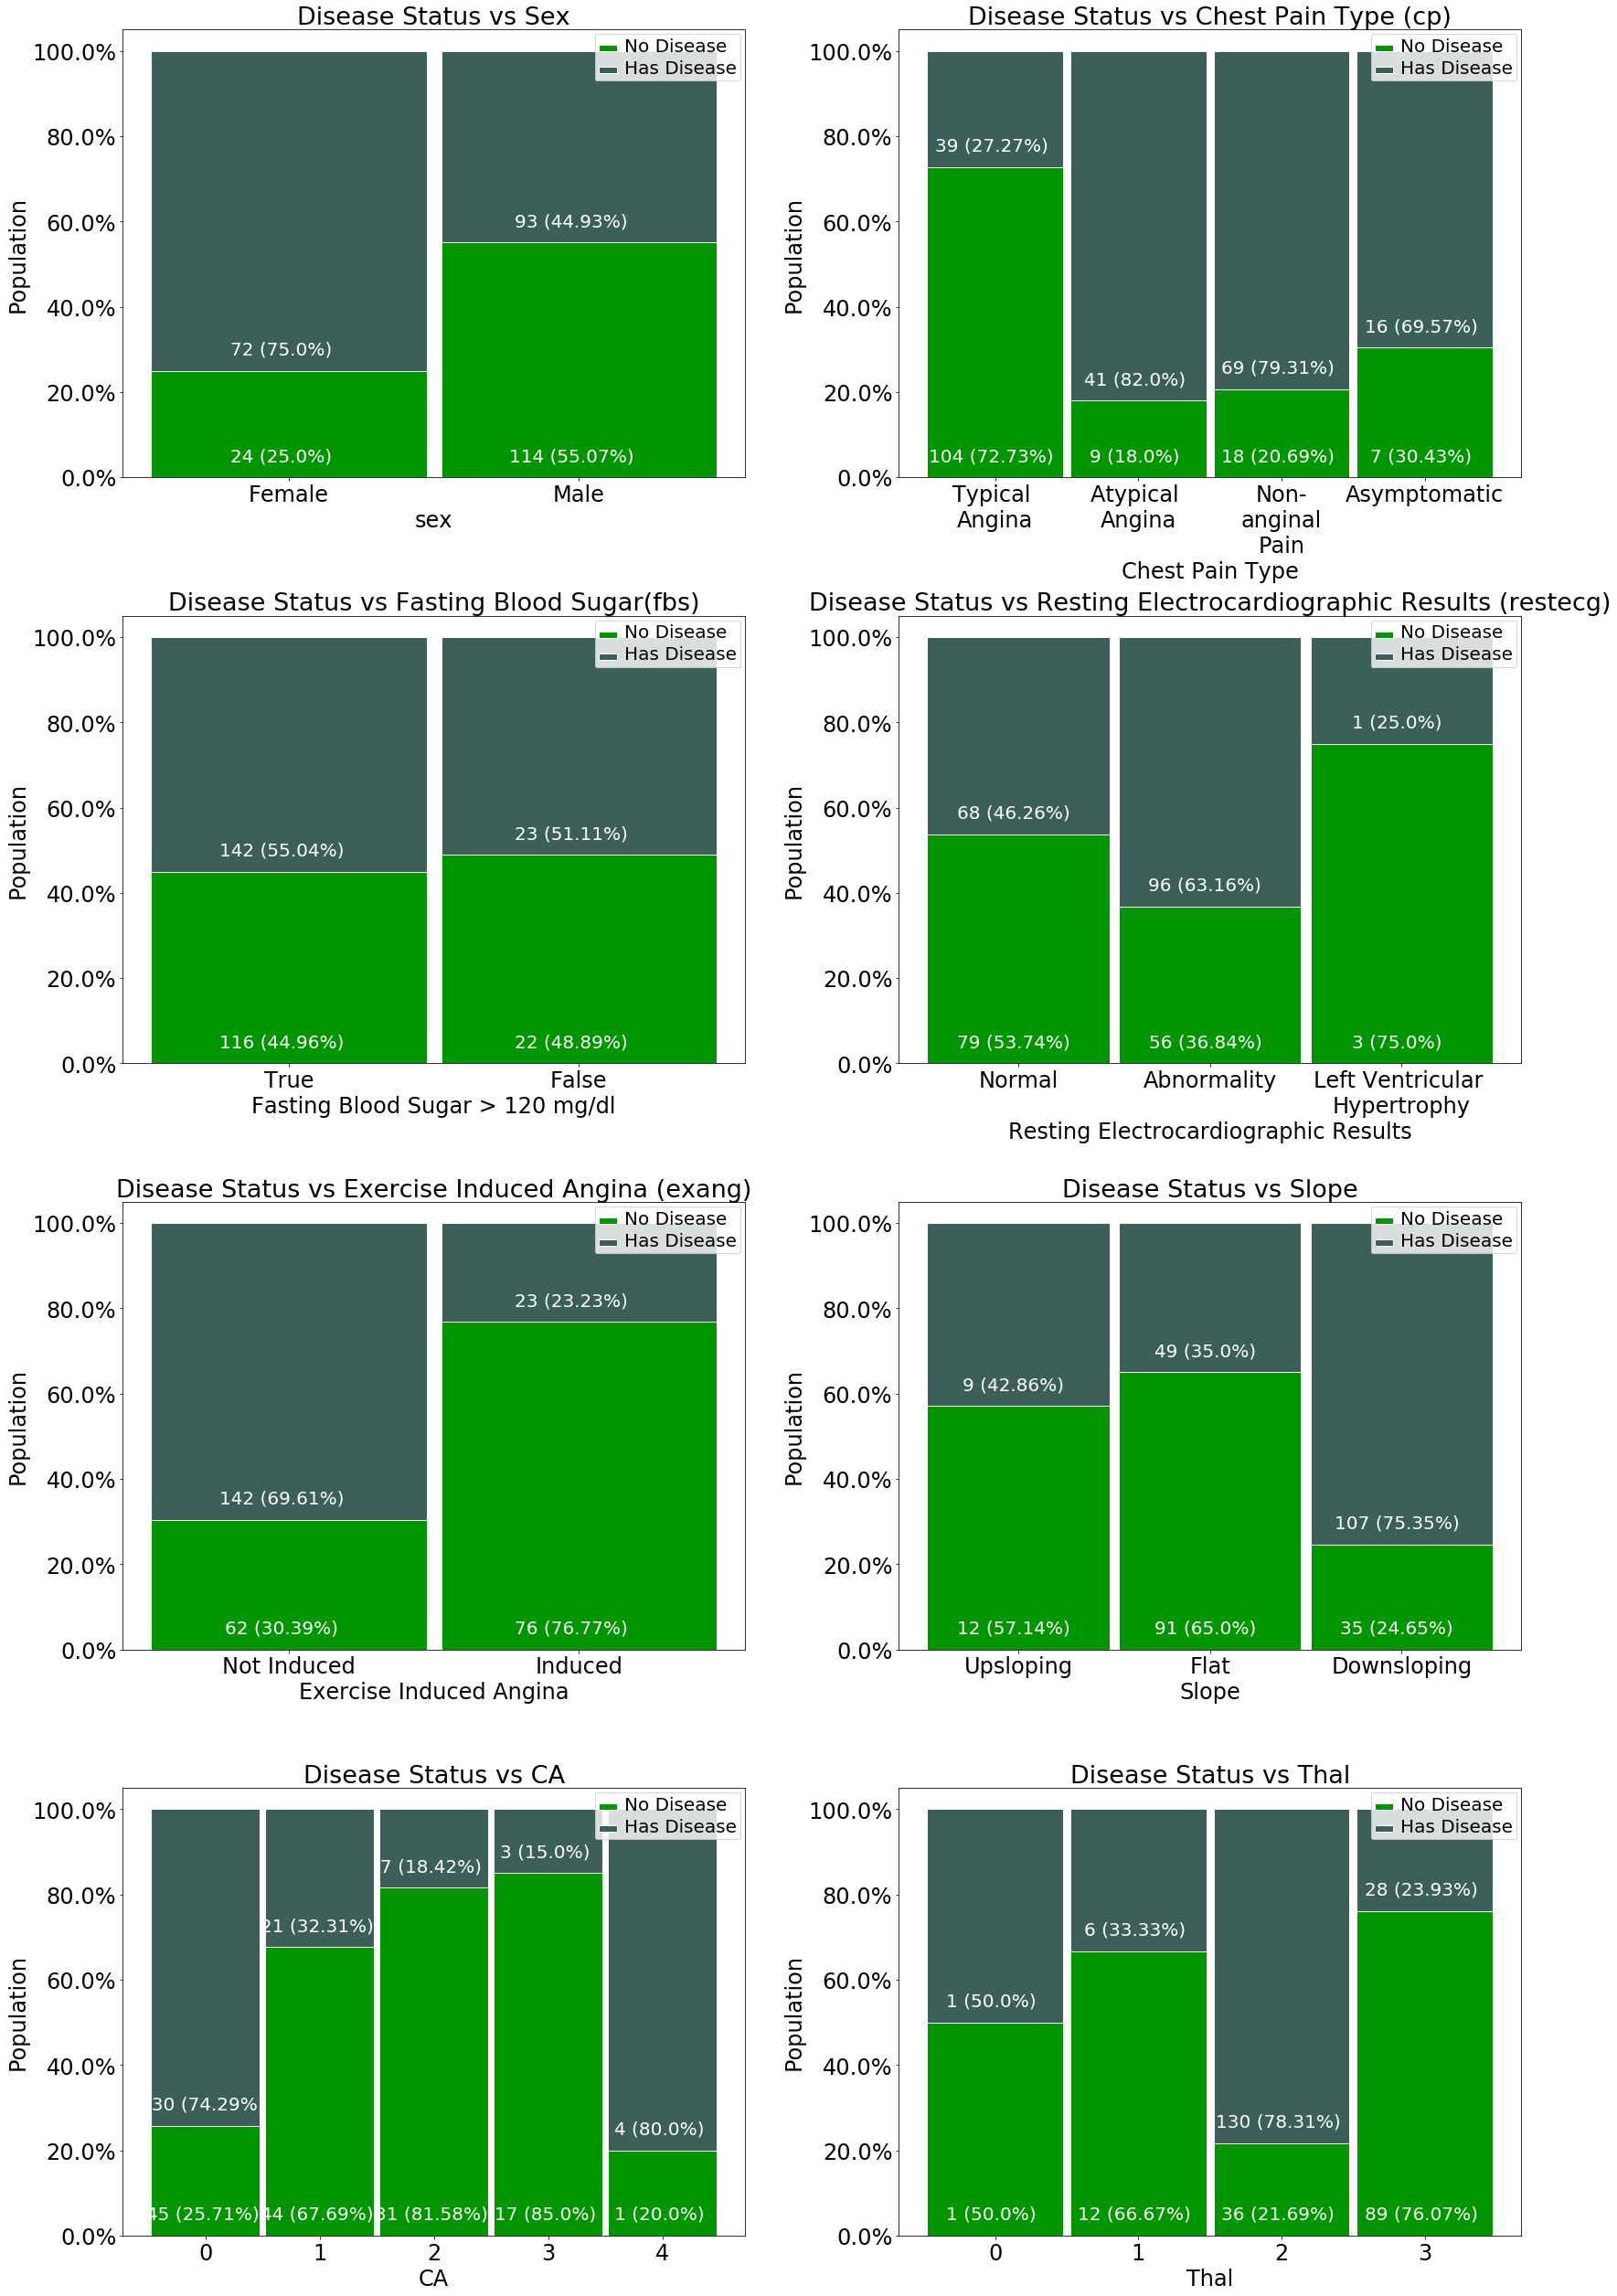

In [19]:
fig = plt.gcf()
fig.set_size_inches(25, 35)
grid_rows = 4
grid_cols = 2

# Draw Disease Status vs Sex chart
plt.subplot(grid_rows, grid_cols, 1)
temp = uwu[['sex','target']].groupby(['sex','target']).size().unstack('target')
temp.rename(index={0:'Female', 1:'Male'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Sex', ylabel = 'Population')

# Draw Disease Status vs Chest pain type chart
plt.subplot(grid_rows, grid_cols, 2)
temp = uwu[['cp','target']].groupby(['cp','target']).size().unstack('target')
temp.rename(index={0:'Typical \nAngina', 1:'Atypical \nAngina', 2:'Non-\nanginal\nPain',3:'Asymptomatic'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Chest Pain Type (cp)', ylabel = 'Population', xlabel = 'Chest Pain Type')

# Draw fbs - fasting blood sugar chart
plt.subplot(grid_rows, grid_cols, 3)
temp = uwu[['fbs','target']].groupby(['fbs','target']).size().unstack('target')
temp.rename(index={0:'True', 1:'False'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Fasting Blood Sugar(fbs)', ylabel = 'Population', xlabel = 'Fasting Blood Sugar > 120 mg/dl')

# Draw restecg - resting electrocardiographic results chart
plt.subplot(grid_rows, grid_cols, 4)
temp = uwu[['restecg','target']].groupby(['restecg','target']).size().unstack('target')
temp.rename(index={0:'Normal', 1:'Abnormality', 2:'Left Ventricular \nHypertrophy'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Resting Electrocardiographic Results (restecg)', ylabel = 'Population', xlabel = 'Resting Electrocardiographic Results')

# Draw exang - exercise induced angina chart
plt.subplot(grid_rows, grid_cols, 5)
temp = uwu[['exang','target']].groupby(['exang','target']).size().unstack('target')
temp.rename(index={0:'Not Induced', 1:'Induced'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Exercise Induced Angina (exang)', ylabel = 'Population', xlabel = 'Exercise Induced Angina')

# Draw slope - the slope of the peak exercise ST segment chart
plt.subplot(grid_rows, grid_cols, 6)
temp = uwu[['slope','target']].groupby(['slope','target']).size().unstack('target')
temp.rename(index={0:'Upsloping', 1:'Flat', 2:'Downsloping'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Slope', ylabel = 'Population', xlabel = 'Slope')

# Draw ca - number of major vessels (0-3) colored by flourosopy chart
plt.subplot(grid_rows, grid_cols, 7)
temp = uwu[['ca','target']].groupby(['ca','target']).size().unstack('target')
temp.rename(columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs CA', ylabel = 'Population', xlabel = 'CA')

# Draw thal chart
plt.subplot(grid_rows, grid_cols, 8)
temp = uwu[['thal','target']].groupby(['thal','target']).size().unstack('target')
temp.rename(columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Thal', ylabel = 'Population', xlabel = 'Thal')
fig.tight_layout()
plt.show()

- Fitur 'sex' bias dalam sampel. Oleh karena itu, mengatakan 'sebagian besar wanita cenderung memiliki penyakit jantung' adalah tidak benar.
- Nyeri dengan jenis nyeri dada Atypical Angina, Non-Anginal Pain, Asymptomatic lebih cenderung memiliki penyakit jantung.

##### Correlation Heat Map

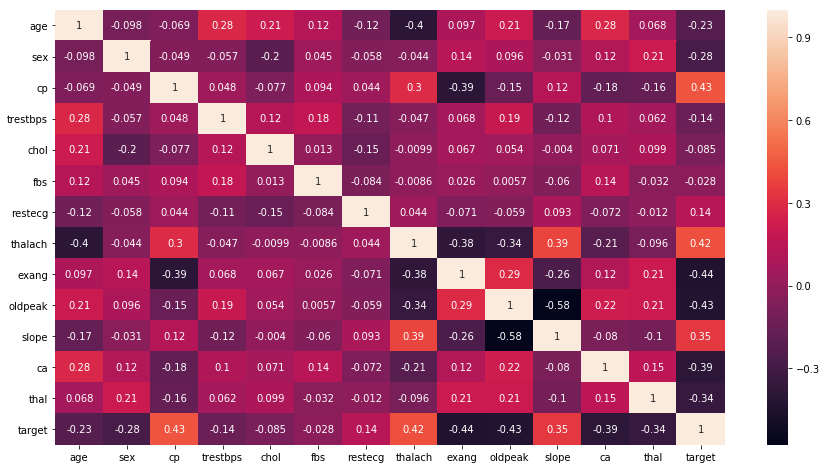

In [21]:
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.heatmap(uwu.corr(), annot = True)
plt.show()

- Tidak ada fitur dengan korelasi lebih dari 0,5.

##### Distributions

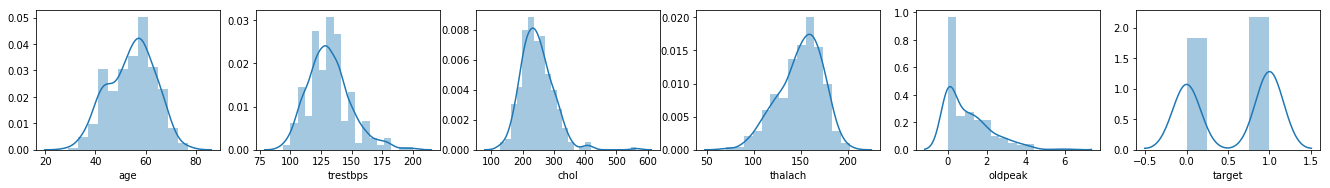

In [22]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
number_of_columns = len(continuous_features)
number_of_rows = 5
plt.figure(figsize=(23, 18))

for i, f in enumerate(continuous_features):
    plt.subplot(number_of_rows + 1, number_of_columns, i + 1)
    sns.distplot(uwu[f], kde=True)

- Fitur Age, trestbps, chol didistribusikan secara normal.
- Kemungkinan terkena penyakit jantung lebih banyak untuk orang dengan usia 50 - 60 tahun.
- Variabel target seimbang.

##### Pair Plots

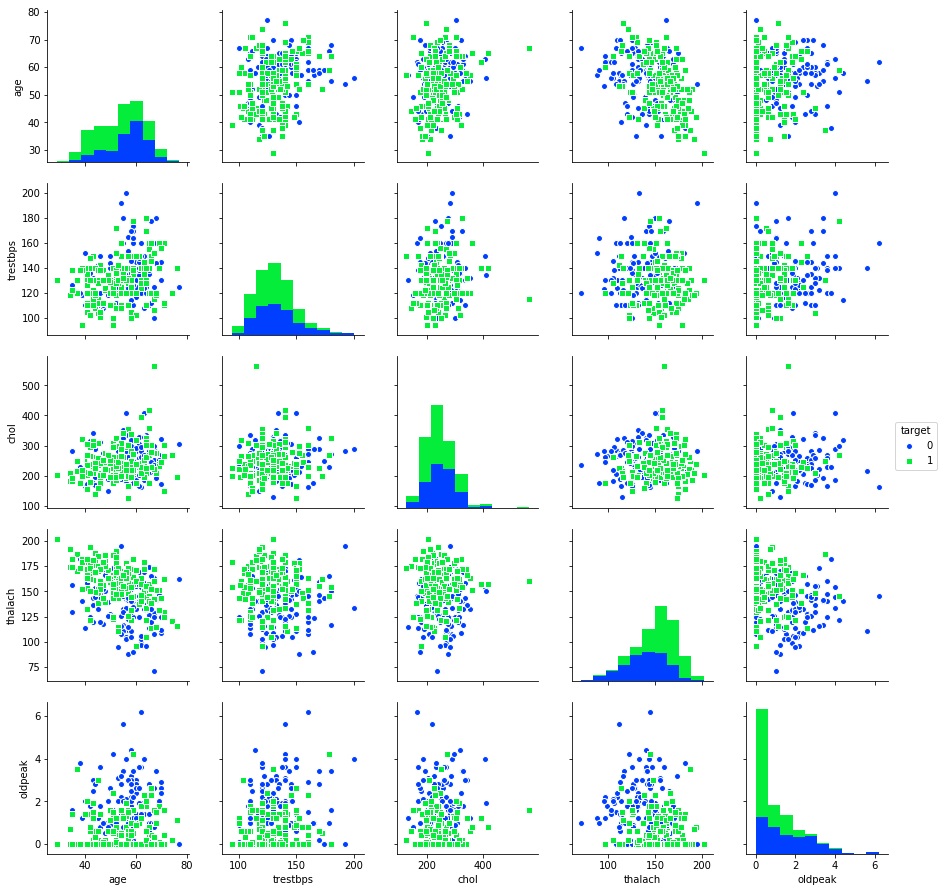

In [24]:
sns.pairplot(uwu, hue = 'target', markers=["o", "s"], vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], palette = sns.color_palette("bright", 10))

### Data Pre Processing

 #### Extract Independent and Target Variables

- Di sini fitur independen akan diekstraksi bersama dengan OneHotEncoding akan dilakukan ke fitur nominal cp, slope, thal dan restecg.
- Parameter drop_first = True seperti yang telah ditetapkan untuk menghindari jebakan variabel dummy setelah One hot encoding

In [25]:
nominal_features = ['cp', 'slope', 'thal', 'restecg']
x = pd.get_dummies(uwu.drop(['target'], axis = 1), columns = nominal_features, drop_first=True).values
y = uwu.target.values

#### Split the Data into Train and Test set

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

####  Feature Scalling

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Dimensionality Reduction

Linear Discriminant Analysis (LDA) akan digunakan sebagai teknik reduksi dimensi untuk dataset ini karena merupakan masalah klasifikasi.

In [28]:
print("Shape of X before Dimensionlity Reduction: ", x_train.shape)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

print("Shape of X after Dimensionlity Reduction: ", x_train.shape)

Shape of X before Dimensionlity Reduction:  (242, 19)
Shape of X after Dimensionlity Reduction:  (242, 1)


### Build and Train the Model

#### Train the Model with Training Set

In [29]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)
y_pred_svm = classifier.predict(x_test)

### Model Evaluation

#### Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix

print("SVM Confusion Matrix")
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)

SVM Confusion Matrix
[[21  6]
 [ 3 31]]


#### K-Fold Cross Validation

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, x_train, y_train, cv = 10)
print("Scores: ", scores)
print("Accuracy: ", round(scores.mean(), 2) * 100, "%")
print("Standard Deviation: +/-", scores.std())

Scores:  [0.76923077 0.875      0.875      0.83333333 0.95833333 0.83333333
 0.91666667 0.83333333 0.79166667 0.91666667]
Accuracy:  86.0 %
Standard Deviation: +/- 0.05619861229308637


###  Model Optimization using Grid Search Technique

Pencarian grid digunakan untuk menemukan hyperparameter terbaik untuk model.

#### Grid Search on SVM

In [32]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Score: ", best_accuracy)
print("Best Params: ", best_parameters)

Best Score:  0.859504132231405
Best Params:  {'C': 1, 'kernel': 'linear'}


#### Area Under the Curve (AUC) for SVM

AUC: 0.914


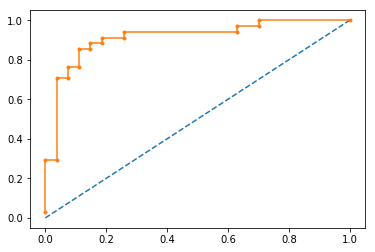

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', C = 1, random_state = 0, probability = True)
classifier.fit(x_train, y_train)
probs = classifier.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### Explanation

Support Vector Machine (SVM) merupakan salah satu metode dalam supervised learning yang biasanya digunakan untuk klasifikasi (seperti Support Vector Classification) dan regresi (Support Vector Regression). Dalam pemodelan klasifikasi, SVM memiliki konsep yang lebih matang dan lebih jelas secara matematis dibandingkan dengan teknik-teknik klasifikasi lainnya. SVM juga dapat mengatasi masalah klasifikasi dan regresi dengan linear maupun non linear.

Model yang umum digunakan untuk menyelesaikan masalah klasifikasi dan
regresi adalah model linear, yaitu model yang merupakan kombinasi linear
dari fungsi basis:

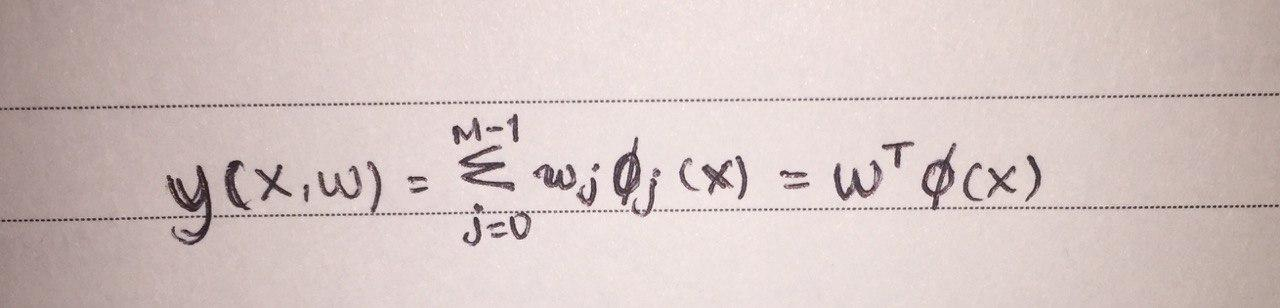

Dimana x = (x1, x2, ..., xD)T adalah variabel input, dan w = (w0, w1, ..., wD)T
adalah parameter, f(x) adalah fungsi basis, M adalah jumlah total parameter
dari model

### Conclussion

- SVM linier dengan C = 1, akan dipilih sebagai model terbaik untuk masalah ini.
- Akurasi terbaik diperoleh sebagai 91,4%

### Referensi 
- dataset : https://www.kaggle.com/ronitf/heart-disease-uci 